# Contents

__[1. Introduction](#1.-Introduction)__  

__[2. Exploratory analysis and feature engineering](#2.-Exploratory-analysis-and-feature-engineering)__  

__[3. Model Selection](#3.-Model-Selection)__  


# 1. Introduction

Clustering is an unsupervised machine learning task, involving discovering groups in data. Clustering helps with pattern discovery. This project aims to use clustering approaches to perform customer segmentation on [Online Retail data](https://www.kaggle.com/datasets/vijayuv/onlineretail).

### Goals of segmnentation:
- discovering similar users
- improving existing models
- tailor marketing strategy to each customer segment.

### Use cases:
- __data summarization__
    - clustering is a step for classification or outlier analysis
    - dimensionality reduction
- __collaborative filtering__
    - grouping of users with similar interests
- __customer segmentation__
    - grouping of customers
- __dynamic trend detection__
    - in social networks:  data is dynamically clustered in a streaming fashion and used to determine patterns of changes.
- __multimedia data analysis__
    - detecting similar areas in images, video, audio.
- __social network analysis__
    - detecting communities
    
### Validation  
- use __case studies__ to illustrate the subjective quality of the clusters
- __measures of the clusters__ (cluster radius or density)
    - can be biased (measures could favor different algorithms in a different way)
- labels can be given to data points - then __correlations of the clusters with the labels__ can be used
    - class labels may not always align with the natural clusters

# 2. Exploratory analysis and feature engineering

In [1]:
import pandas as pd
import numpy as np
from importlib import reload
from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn.cluster import SpectralClustering, OPTICS, MeanShift, KMeans, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [46]:
import tools as t
reload(t)

from tools.preprocessing import eda
from tools.modeling import clustering

data = eda.Dataset(
    features=['StockCode', 'InvoiceDate', 'Country', 'Quantity', 'UnitPrice', 'CustomerID'],
    features_ohe=['StockCode', 'Country'],
)
print(data)

Data transformation class.         
---------------------------        
Inputted features: ['StockCode', 'InvoiceDate', 'Country', 'Quantity', 'UnitPrice', 'CustomerID'].         
---------------------------        
Transformation steps:         
1. Correct data types         
2. One Hot Encoding of ['StockCode', 'Country']         


In [42]:
df1 = data.get_transformed()
df1 = df1.iloc[:10000, :]
df1

,Quantity,UnitPrice,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,StockCode_10002,StockCode_10080,StockCode_10120,StockCode_10123C,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,17850,2010,1,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,17850,2010,1,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,17850,2010,1,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,17850,2010,1,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,17850,2010,1,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,9.95,13174,2010,5,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9996,2,4.95,13174,2010,5,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,2,4.95,13174,2010,5,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9998,2,2.55,13174,2010,5,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
df1.dropna(inplace=True)

C:\Users\nastiag67\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [44]:
import tools as t
reload(t)
from tools.modeling import clustering

clustering = clustering.Clustering(df1)

KMeans(n_clusters=3, random_state=42)


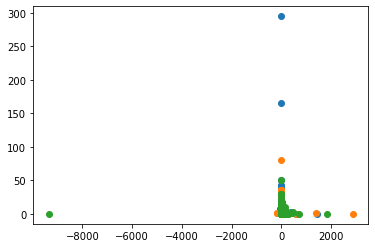

In [45]:
name = 'Kmeans'
# from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)
steps = [
#     ('scaler', StandardScaler())
]
plot=True

model_kmeans, ypred_kmeans = clustering.check_model(name, model, steps, plot)

# TEST